![Logo MDS](./images/logo_mds.png)

El objetivo de esta clase es que os familiaricéis con dos de las librerías de visualización más importantes de Python: **matplotlib** y **seaborn**. Matplotlib es la librería de visualización estándar de Python, y permite crear una infinidad de gráficos diferentes y altamente personalizables. Por su parte, seaborn está basada en matplotlib y ofrece una interfaz muy sencilla de utilizar, de manera que con muy poco código podemos obtener gráficos muy conseguidos.

El objetivo principal de la clase es que seáis capaces de obtener visualizaciones rápidas de los datos que estéis explorando, de forma que os permitan analizar las principales características del juego de datos y realizar las primeras hipótesis que os permitan seguir avanzando. 

La estructura de la clase será la siguiente:

1. **Visualización básica con matplotlib**: Empezaremos con la librería estándar de Python para familiarizarnos con conceptos como figuras, ejes, múltiples subplots y las opciones de personalización básicas (etiquetas de datos, color, tamaño de letra, etc)

2. **Visualización básica con pandas y seaborn**: En esta segunda parte nos centraremos en distintos tipo de gráficos (gráficos de puntos, histogramas, gráficos circulares, boxplots, etc) y veremos como obtenerlos y personalizarlos de una manera muy sencilla con estas librerías. 

3. **Visualización avanzada: caso práctico**: En la tercera parte veremos cómo obtener una visualización muy conseguida, centrándonos en cómo mejora con cada uno de los pasos que vamos añadiendo. 

4. **Ejercicios**

# Visualización básica con matplotlib

Como siempre, en primer lugar importamos las librerías que vayamos a utilizar:

In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

# Esta línea solo es necesaria en Jupyter notebook y nos permite hacer zoom en las gráficas y hacerlas más interactivas
%matplotlib notebook

## Plot básico

Dibujar un gráfico básico utilizando Python es realmente rápido y compacto, como vamos a ver a continuación. Lo primero que hacemos, es generar un **array** con los datos que vamos a graficar:

In [2]:
data = np.arange(10)
data

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

Solamente con la instrucción ``plt.plot`` podemos generar un gráfico básico que nos permita visualizar nuestros datos:

<IPython.core.display.Javascript object>


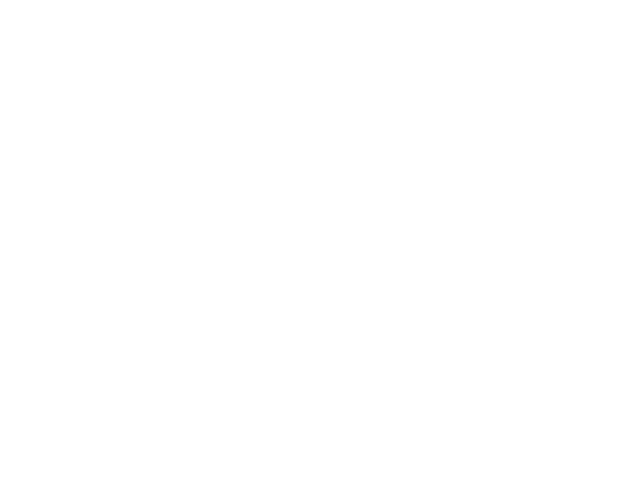

In [3]:
plt.plot(data)

Sin embargo, a este gráfico le faltan una gran cantidad de cosas como: etiquetas en los ejes, un título, etc.

## Figuras y subplots

Las gráficas en matplotlib se representan dentro de un objeto llamado ````Figure````, que simplemente es un espacio en blanco reservado para poder dibujar gráficas en él. 

Para crear una nueva figura se utiliza el método ``Figure()``, que tiene un montón de opciones de personalización, pero las más importantes son:
1. **num**: int o str. Es el identificador propio de cada figura, por defecto num = None.
2. **figsize**: (float, float). Es el tamaño de la figura.

In [4]:
fig = plt.figure(num = 1, figsize = (5, 5))

Dentro de la misma figura podemos tener dos o más subplots. Para añadirlos podemos utilizar ````add_subplot````: 

In [5]:
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)

En el código anterior estamos creando un subplot, diciéndole que la figura será 2x2 (es decir, 2 filas y 2 columnas: tendrá sitio para cuatro subplots) y que estamos seleccionando sucesivamente el primer, segundo y tercer subplot y guardándolos en una variable. 

Si ahora utilizamos el comando ``plot()`` sin especificar el subplot en el que queremos graficar nuestros datos, por defecto lo hará en el último creado (o crearía uno si fuera necesario).

In [6]:
plt.plot(data)

 Sin embargo, también podemos especificarle en cuál de todos los subplots queremos que grafique los datos:

In [7]:
ax1.plot(np.random.rand(10))

En lugar de crear una figura y añadir los ejes después, también tenemos disponible un método muy útil, ``subplots``, que permite crear una figura y obtener variables que contengan los diferentes subplots en un solo paso, sin tener que añadirlos uno a uno:

<IPython.core.display.Javascript object>


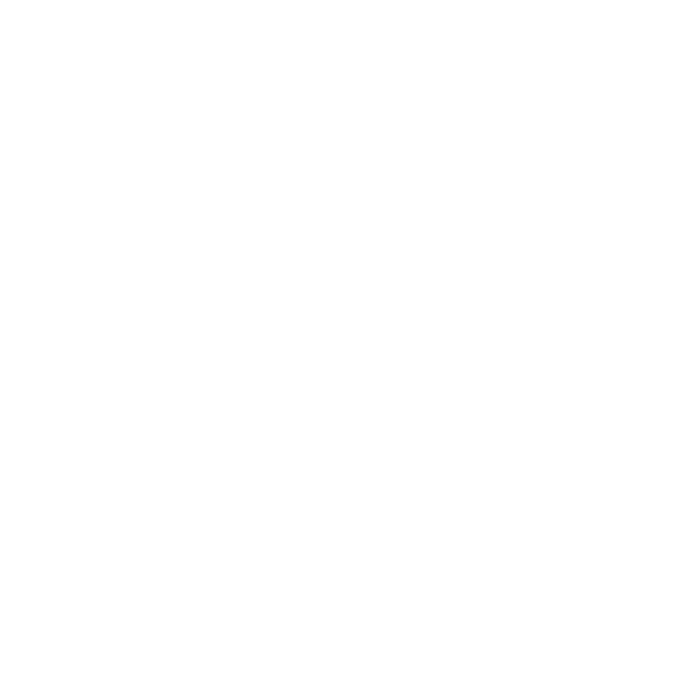

In [8]:
fig, axs = plt.subplots(2, 2, figsize = (7, 7))

In [9]:
fig, axs

(<Figure size 700x700 with 4 Axes>,
 array([[<AxesSubplot:>, <AxesSubplot:>],
        [<AxesSubplot:>, <AxesSubplot:>]], dtype=object))

<IPython.core.display.Javascript object>


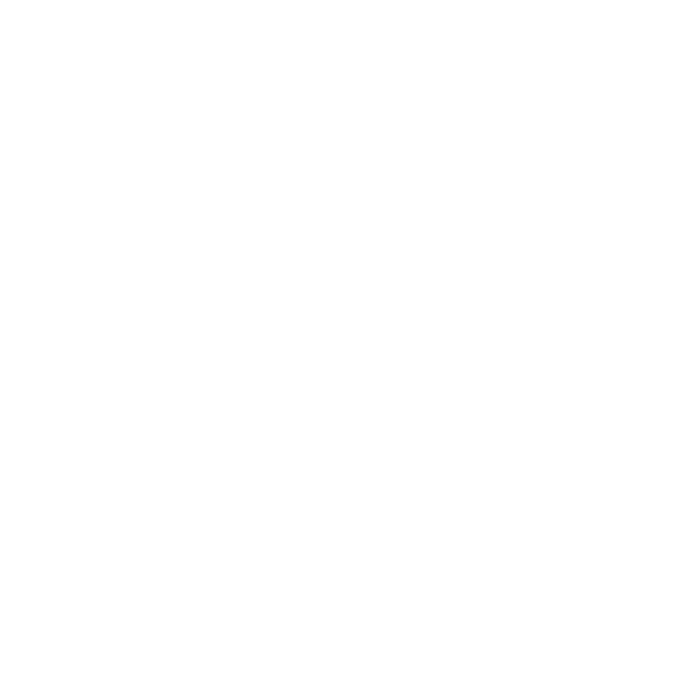

In [10]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize = (7, 7))

Los parámetros más comunes que podemos pasarle a ``subplots`` son los siguientes:

| Argumento |  Descripción | Tipo de dato y valor por defecto
| :----|:------------|-----------|
| nrows | Número de filas con subplots que tendrá la figura | int, por defecto: 1 |
| ncols | Número de columnas con subplots que tendrá la figura | int, por defecto: 1|
| sharex | Controla el intercambio de propiedades entre los ejes x e y | bool o {'none', 'all, 'row', 'col'} |
| sharey | Controla el intercambio de propiedades entre los ejes x e y | bool o {'none', 'all, 'row', 'col'} |


In [11]:
ax1.scatter(np.random.rand(100), np.random.rand(100), color = 'r')

Además, también podemos ajustar el espacio entre subplots con la función:

``subplots_adjust(left = None, bottom = None, right = None, top = None, wspace = None, hspace = None)``

La función anterior nos permite añadir espacios a la izquierda, derecha, abajo, arriba o espacio horizontal o vertical entre los subplots. 

### Ejercicio:

Crear una figura con cuatro subplots (2 filas x 2 columnas) que compartan ambos ejes, y **utilizando un bucle**, recorrer cada uno de los subplots y dibujar un scatter plot (como acabamos de ver en el ejemplo anterior) con un color diferente en cada subplot.

<IPython.core.display.Javascript object>


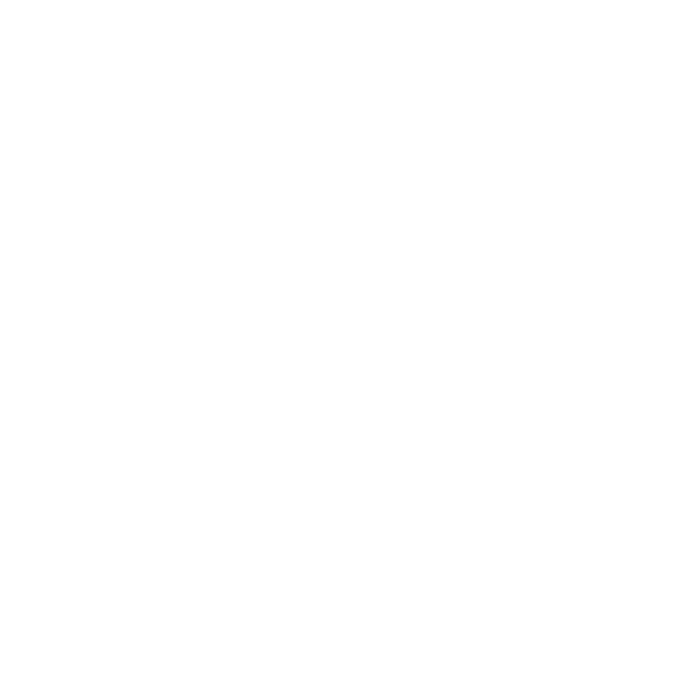

In [12]:
fig, axs = plt.subplots(2, 2, figsize = (7, 7), sharex = True, sharey = True)

In [13]:
axs

array([[<AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>]], dtype=object)

## Personalización de los gráficos

### Colores, marcadores y estilos de línea

Para crear gráficos atractivos hay que tener en cuenta elementos como el color, el tipo de marcador, el estilo de la línea, el tamaño de la fuente que estemos utilizando... Todas estas opciones son totalmente personalizables en Python de una manera bastante sencilla. La mayoría de ellas se pasan como argumentos opcionales a la función ````plot()````:


<IPython.core.display.Javascript object>


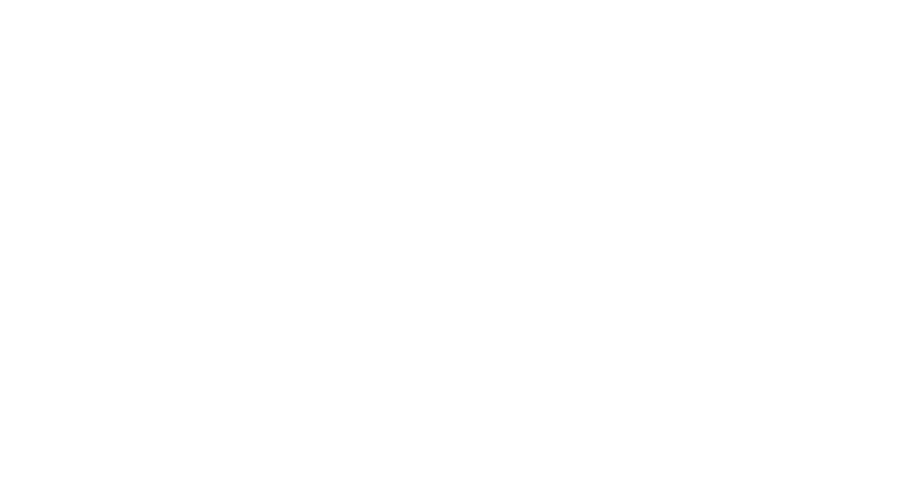

In [14]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (9, 5), sharey = True)

ax1.plot(np.random.randn(200).cumsum(), color = 'orange', linestyle = '--', marker = '>', markersize = 5.)
ax1.set_title('Y')

ax2.plot(np.random.randn(200).cumsum(), 'b-o',label = 'Suma acumulada')
ax2.set_title('B')
plt.legend()

Las abreviaciones de colores, sin embargo, sólo están disponibles para los colores más comunes. Si ejecutáis ``plt.plot?`` podéis ver las abreviaturas de colores y símbolos disponibles, así como otros parámetros que se le pueden pasar a la función anterior. 

In [15]:
plt.plot?

**Nota**: Obervad que a veces utilizamos la interfaz matplotlib.pyplot, por ejemplo cuando llamamos a ``plt.plot()`` y otras veces utilizamos ``ax.plot()``. Los dos comandos anteriores generalmente dan el mismo resultado, sin embargo el primero actúa sobre sobre el ``AxesSubplot`` más reciente, y al segundo le estamos pasando una referencia explícita del subplot en el que queremos que actúe. Lo mismo pasará con otros comandos que utilizaremos más adelante. 

### Ticks, etiquetas y leyendas

Podemos continuar personalizando los dos gráficos anteriores, por ejemplo añadiendo un título:

<IPython.core.display.Javascript object>


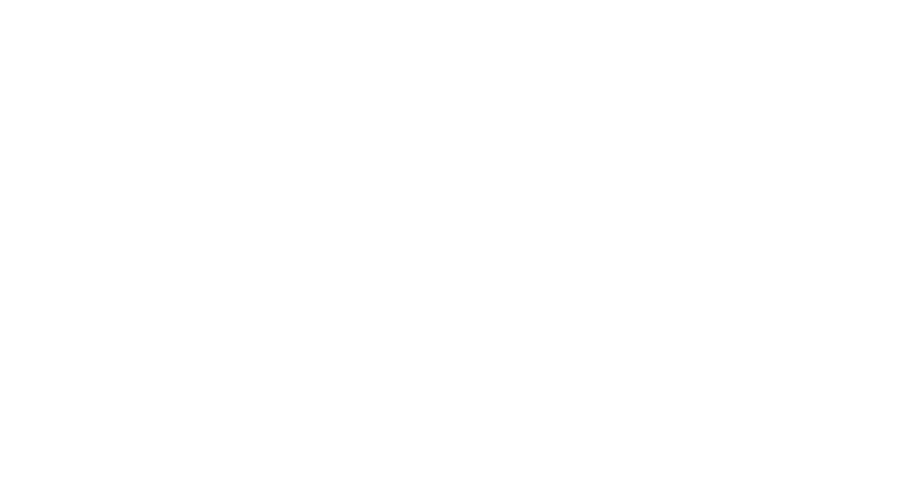

Text(0.5, 1.0, 'Gráfico azul')

In [16]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (9, 5), sharey = True)

ax1.plot(np.random.randn(200).cumsum(), color = 'orange', linestyle = '--', marker = '*', markersize = 4.)
ax2.plot(np.random.randn(200).cumsum(), 'b-o', label = 'Suma acumulada')

# Como estamos llamando a plt.title(), colocará un título en el último subplot con el que hayamos trabajado
plt.title("Gráfico azul") 

In [17]:
# Le estamos pasando la referencia del subplot en el que queremos que añada un título
ax1.set_title("Gráfico naranja")

Text(0.5, 1.0, 'Gráfico naranja')

También podemos añadirle una leyenda al gráfico:

In [18]:
plt.legend()

Podemos añadir también nombres y límites a los ejes:

In [19]:
# La equivalencia a esto con la interfaz matplotlib.pyplot sería plt.xlabel()

ax1.set_xlabel("x", fontsize = 14)
ax1.set_ylabel("y", fontsize = 14)
ax2.set_xlabel("x", fontsize = 14)

Text(0.5, 0, 'x')

In [20]:
# Notar que esta instrucción solo se aplicar a ax1
ax1.set_xlim(0, 100)

(0.0, 100.0)

Sin embargo, la siguiente instrucción se aplicará a los dos, ya que comparten el eje y (sharey = True)

In [21]:
ax1.set_ylim(-5, 15)

(-5.0, 15.0)

También podemos añadirles las etiquetas que nosotros queramos y cambiar su tamaño.

In [22]:
ax1.set_xticks([0, 25, 50, 75, 100])

In [23]:
ax2.set_xticks([0, 25, 50, 75, 100])

Sin embargo, notar que estas etiquetas no tienen por qué ser numéricas:

In [24]:
# Esta es la lista con las localizaciones de los ticks (la posición numérica)
ax1.set_xticks([0, 25, 50, 75, 100])
ax2.set_xticks([0, 25, 50, 75, 100])

# Estas son las etiquetas de los ticks, y siempre deben añadirse después de fijar las posiciones con el comando anterior
ax1.set_xticklabels(["uno", "dos", "tres", "cuatro", "cinco"], rotation = 45, fontsize = 10)


[Text(0, 0, 'uno'),
 Text(25, 0, 'dos'),
 Text(50, 0, 'tres'),
 Text(75, 0, 'cuatro'),
 Text(100, 0, 'cinco')]

### Ejercicio
Dibujar en una gráfica las funciones **y = a+bx**, donde a (corte con el eje x) y b (corte con el eje y) son dos números cualquiera), y **y = x^2**. Para ello, tendréis que crear dos funciones que, tomando como variable de entrada un número cualquiera x, devuelvan a la salida el número y.

Además, la gráfica tiene que tener:
- Un título
- Diferentes colores y marcadores para las dos funciones
- Etiquetas en los ejes
- Una leyenda que distinga las dos funciones

In [25]:
a = int(np.random.randint(1,100,1))
b = int(np.random.randint(1,100,1))

def recta_reg(x):
    y = a+b*x
    return y

def cuadrada(x):
    y = x**2
    return y

res_cuadrada = []
res_recta = []
x = np.arange(0,100,1)

for i in x:
    k = recta_reg(i)
    l = cuadrada(i)
    res_recta.append(k)
    res_cuadrada.append(l)

<IPython.core.display.Javascript object>


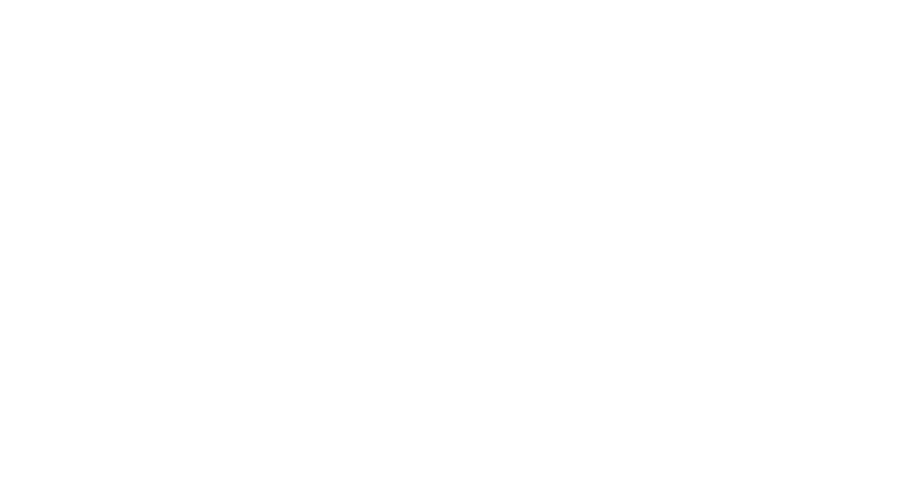

Text(0, 0.5, 'y')

In [26]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (9, 5), sharey = True)
ax1.plot(res_recta, color = 'red', linestyle = '-',marker='^', markersize = 4.,label = 'a+bx', alpha=0.8)
ax1.set_title('Recta de Regresión')
ax1.legend()
ax1.set_xlabel("X", fontsize = 9)
ax1.set_ylabel("y", fontsize = 9)
ax1.set_ylim(0, 8000)

ax2.plot(res_cuadrada, '-o', label = 'x^2',alpha=0.8)
ax2.set_title('Función Cuadrática')
ax2.legend()
ax2.set_xlabel("X", fontsize = 9)
ax2.set_ylabel("y", fontsize = 9)

<IPython.core.display.Javascript object>


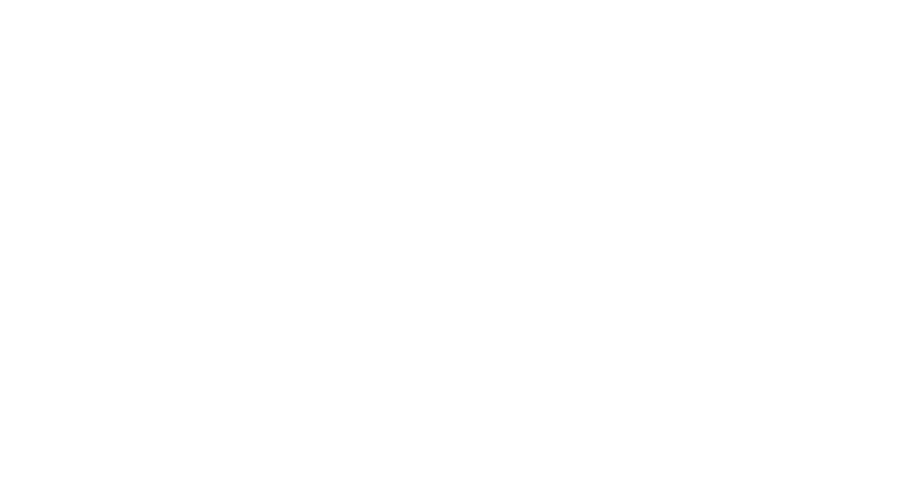

C:\Users\aleex\AppData\Local\Temp/ipykernel_16816/907163412.py:4: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "-o" (-> marker='o'). The keyword argument will take precedence.
  plt.plot(res_cuadrada, '-o', label = 'x^2',alpha=0.8,marker='o',color='navy')


In [27]:
import seaborn as sns
fig, ax = plt.subplots(figsize = (9, 5))
plt.plot(res_recta, color = 'red', linestyle = '--',marker='^', markersize = 4.,label = 'a+bx', alpha=0.8)
plt.plot(res_cuadrada, '-o', label = 'x^2',alpha=0.8,marker='o',color='navy')
plt.legend()
plt.title('Funciones Matemáticas',size=12)
plt.style.use('ggplot')
sns.despine()

### Dibujar formas

También es posible dibujar figuras tales como círculos y cuadrados en un plot de python. La mayoría de estas formas (``patches``) se encuentran en ``matplotlib.patches``, pero en ``matplotlib.pyplot`` podemos encontrar las más comunes. Podemos añadir las figuras utilizando el método ``axes.add_patches``.

<IPython.core.display.Javascript object>


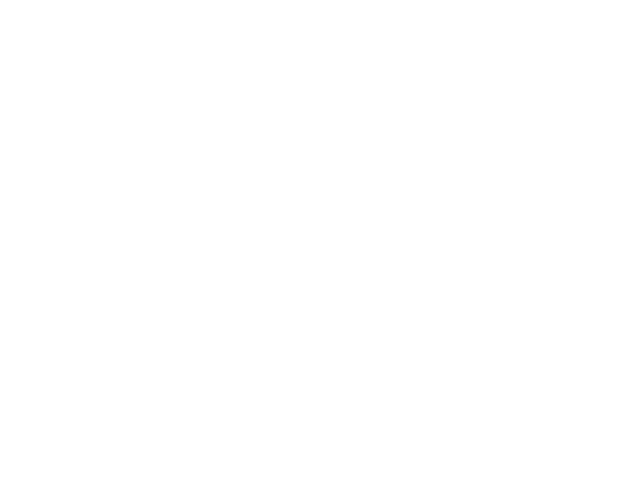

In [28]:
from matplotlib import patches

fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xlim(-20, 50)
ax.set_ylim(-20, 50)
ax.set_title("Figuras geométricas")

circle = patches.Circle(xy = (1, 1), radius = 10, color = "mediumblue")
rectangle = patches.Rectangle(xy = (20, 10), width = 30, height = 10, angle = 45, color = "yellow")

In [29]:
ax.add_patch(circle)
ax.add_patch(rectangle)

### Guardar gráficas

Guardar gráficas a un archivo es muy sencillo, solamente necesitamos utilizar el método ``plt.savefig(ruta del archivo)``. El tipo de archivo en el que se guardarán se infiere de la extensión de archivo que utilicemos en el nombre con el que la queremos guardar. Por ejemplo, podemos guardar la figura anterior en formato png ejecutando:

In [30]:
plt.savefig("Gráfica_con_formas.png")

### Configuración de matplotlib

En todos los ejemplos anteriores hemos modificado el tamaño del título, el tamaño del nombre de los ejes o el tamaño de los ticks. Si queremos evitar hacer esto cada vez para cada uno de las gráficas que queramos hacer, podemos cambiar la configuración por defecto de matplotlib. Así, evitaremos tener que hacer los mismos pasos en cada gráfica y, si en alguna queremos cambiar algo, lo haremos para esa en concreto. 

Para ello se usa el método ``rc``.

In [31]:
# Le decimos que todas las figuras por defecto serán de tamaño (10, 7)
plt.rc('figure', figsize = (7, 3))

En general, a ``rc`` le pasamos como primer parámetro aquello que queremos modificar y como segundo parámetro los nuevos valores que queremos darle. También podemos establecer varias a la vez utilizando un diccionario.

In [32]:
font = {'family' : 'monospace',
        'weight' : 'bold',
        'size'   : 12}

plt.rc('font', **font) 

También se pueden crear distintos estilos personalizados y utilizarlos llamando al método ``style.use``. 

Por ejemplo, si creamos un archivo ./images/presentation.mplstyle con el siguiente contenido:

``
figure.figsize: 6, 4
figure.titlesize : 22
axes.titlesize : 22
axes.labelsize : 18
lines.linewidth : 3
lines.markersize : 5
xtick.labelsize : 14
ytick.labelsize : 14
font.family : serif
font.style : normal
font.variant : small-caps
font.weight : normal
font.size : 14 ``

Luego podemos utilizarlo haciendo ``plt.style.use('./images/presentation.mplstyle')``. 

In [33]:
from matplotlib.style import reload_library

plt.style.use('./images/presentation.mplstyle')
reload_library()

<IPython.core.display.Javascript object>


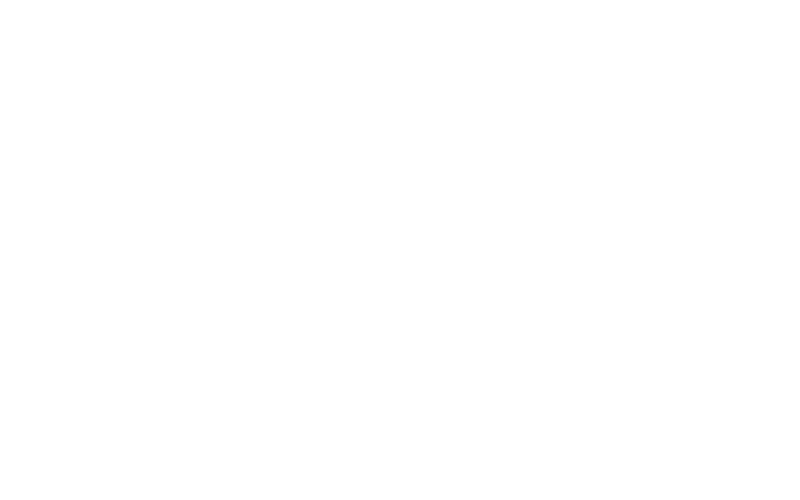

Text(0.5, 1.0, 'Scatter plot')

In [34]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(np.arange(40), np.arange(40) + 3*np.random.randn(40), linestyle = "-.")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_title("Scatter plot")

Además, python ya tiene varios estilos definidos que podemos utilizar (https://matplotlib.org/3.1.0/gallery/style_sheets/style_sheets_reference.html).

# Visualización básica con pandas y seaborn

Como hemos visto hasta ahora, la librería matplotlib permite una gran personalización de los gráficos, pero es cierto que en ocasiones puede ser bastante laboriosa. Sin embargo, existen librerías como **seaborn**, orientadas específicamente hacia representación estadística, que facilitan el trabajo con los datos y la personalización de los gráficos. 

## Visualización con pandas

Utilizaremos un dataset basado en datos de Netflix para ir visualizando distintos tipos de gráficos y la información que nos aportan.

In [35]:
netflix = pd.read_csv("./Datasets/netflix_titles.csv")

In [36]:
netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


Lo primero que haremos será preparar un poco el dataset para que luego sea más sencillo utilizar los datos:

In [37]:
netflix["date_added"] = pd.to_datetime(netflix['date_added'])
netflix["year_added"] = netflix['date_added'].dt.year
netflix["month_added"] = netflix["date_added"].dt.month

netflix.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021.0,9.0
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021.0,9.0
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021.0,9.0
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021.0,9.0
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021.0,9.0


In [38]:
netflix.dropna(subset = ['year_added', 'month_added', 'duration'], inplace = True)

In [39]:
netflix.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021.0,9.0
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021.0,9.0
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021.0,9.0
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021.0,9.0
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021.0,9.0


In [40]:
netflix["duration (min)"] = netflix.loc[netflix["duration"].str.contains("min")]["duration"].str.replace(" min", "").astype(int)
netflix["seasons"] =  netflix.loc[netflix["duration"].str.contains("Season")]["duration"].str.replace(" Season", "").replace("s", "", regex = True).astype(int)

netflix.drop(columns = "duration", inplace = True)

In [41]:
netflix.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,listed_in,description,year_added,month_added,duration (min),seasons
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,Documentaries,"As her father nears the end of his life, filmm...",2021.0,9.0,90.0,NaN
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021.0,9.0,NaN,2.0
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021.0,9.0,NaN,1.0
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021.0,9.0,NaN,1.0
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021.0,9.0,NaN,2.0


## Gráficos circulares

Los gráficos circulares se utilizan cuando queremos ver la proporción existente entre los distintos valores de una variable. Lo ideal es que los valores que puede tomar la variable no sean demasiados, ya que el ojo humano no es muy bueno distinguiendo ángulos, y quizá en ese caso sería más apropiado un gráfico de barras.

Para ver cómo hacer un gráfico circular a partir de un dataframe podemos visualizar el porcentaje de series y películas añadidas en Netflix en 2019.

In [42]:
netflix[netflix["year_added"] == 2019]["type"].value_counts()

Movie      1424
TV Show     592
Name: type, dtype: int64

<IPython.core.display.Javascript object>


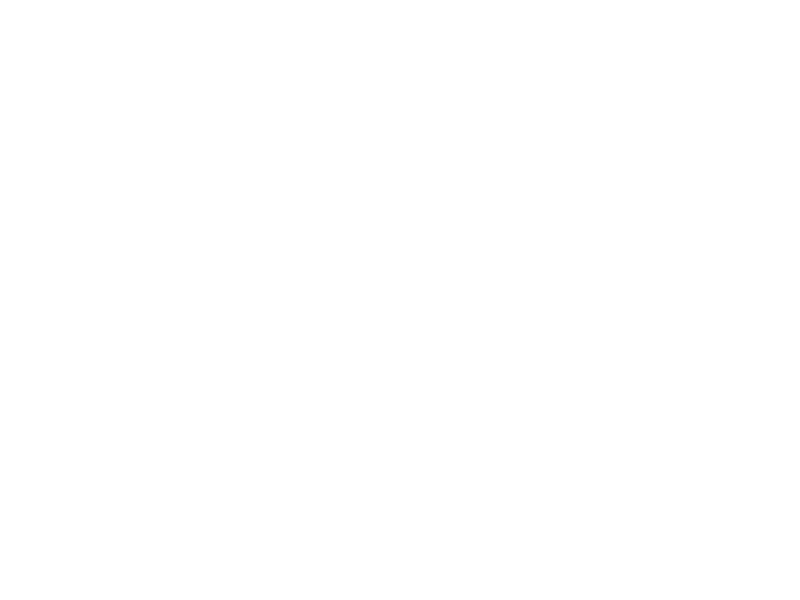

Text(0.5, 1.0, 'Porcentaje de series y películas añadidas en 2019')

In [43]:
plt.figure()

circle_plot = netflix[netflix["year_added"] == 2019]["type"].value_counts()

circle_plot.plot(kind = "pie",
                 figsize = (8, 6), 
                 shadow = False,
                 title = None,
                 startangle = 90, 
                 autopct='%1.1f%%',
                 textprops = {'fontsize': 12})

plt.ylabel('')

plt.title("Porcentaje de series y películas añadidas en 2019")

## Gráficos de barras

Cuando queramos resumir un conjunto de datos por categoría, pero existiendo múltiples valores de dicha categoría, lo más habitual es utilizar un gráfico de barras. En este tipo de gráficos es más sencillo comparar los valores de cada una de las categorías, especialmente si las ordenamos ascediente o descendientemente.

Los gráficos de barras pueden ser tanto verticales como horizontales.

Para ver cómo podemos construir gráficos de barras a partir de un dataframe, podemos filtrar aquellos países que hayan producido más películas o series en Netflix. Por ejemplo, digamos los 10 primeros países.

<IPython.core.display.Javascript object>


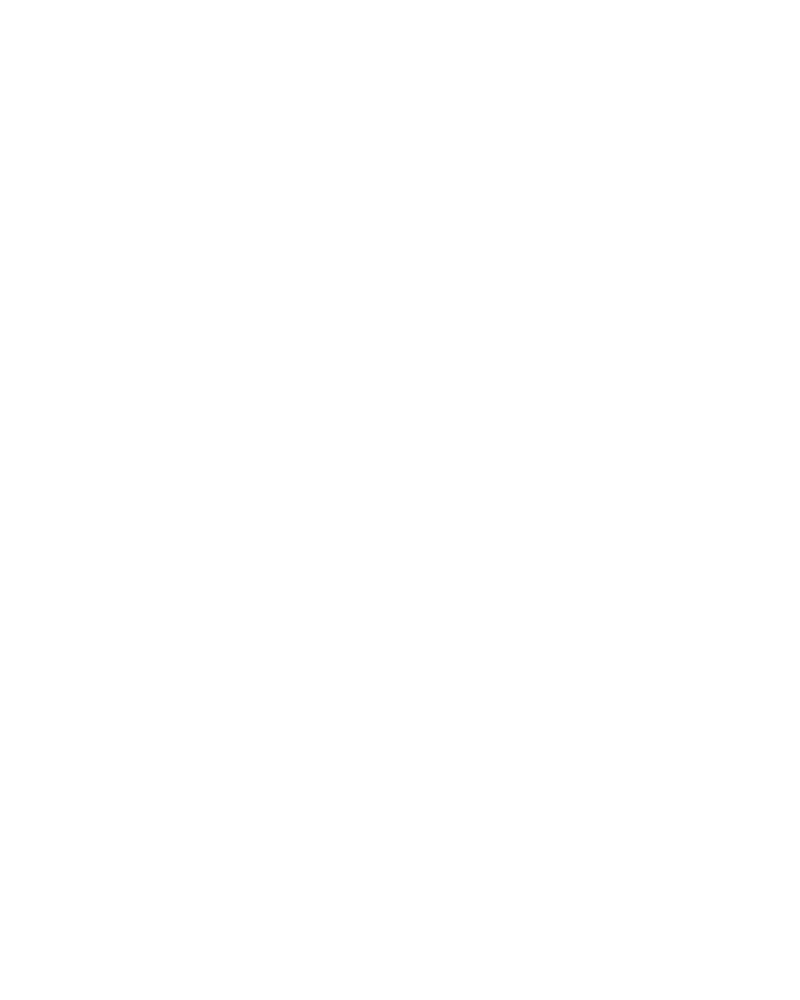

In [44]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize = (8, 10))
plt.subplots_adjust(hspace=0.5)

netflix_movies = netflix.loc[netflix["type"] == "Movie"]["country"].value_counts()[:10]

netflix_movies.plot.bar(ax = ax1,
                        color = "orange",
                        rot = 45,
                        title = "Países con más películas en Netflix")

netflix_series = netflix.loc[netflix["type"] == "TV Show"]["country"].value_counts()[:10]

netflix_series.plot.barh(ax = ax2,
                        color = "green",
                        rot = 0,
                        title = "Países con más series en Netflix")


ax1.grid(True, alpha = 0.4)
ax2.grid(True, alpha = 0.4)

## Gráficos de líneas

Los gráficos de líneas permiten visualizar los cambios a lo largo de un rango continuo, como por ejemplo el tiempo. 

De esta manera, será muy sencillo visualizar la tendencia general, los cambios de tendencia y comparar simultáneamente distintas tendencias. 

Por ejemplo, podemos visualizar el número de series y películas que se añaden a Netflix a lo largo de los meses:

In [45]:
netflix["year_month_added"] = (netflix["year_added"]*100+netflix["month_added"]).astype(int).astype(str)
netflix.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,listed_in,description,year_added,month_added,duration (min),seasons,year_month_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,Documentaries,"As her father nears the end of his life, filmm...",2021.0,9.0,90.0,NaN,202109
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021.0,9.0,NaN,2.0,202109
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021.0,9.0,NaN,1.0,202109
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021.0,9.0,NaN,1.0,202109
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021.0,9.0,NaN,2.0,202109


Para ver cómo podemos representar un gráfico de líneas veamos la evolución del número de series añadidas cada año.

<IPython.core.display.Javascript object>


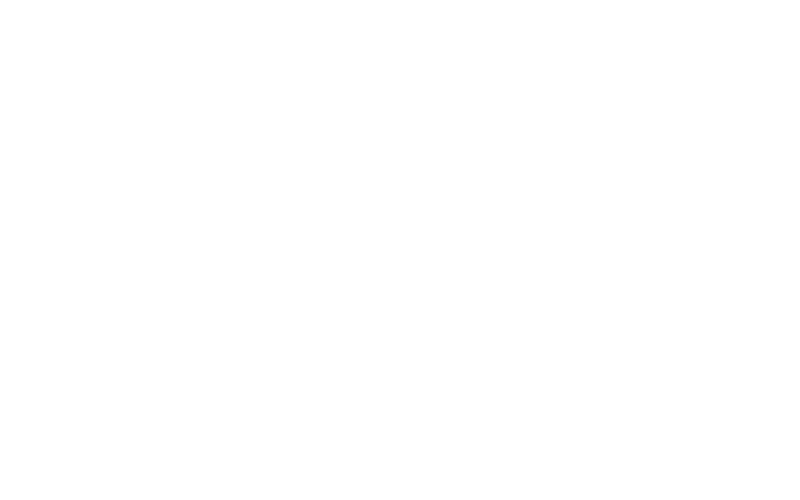

In [46]:
fig, ax = plt.subplots()

tvShowsByYear = netflix[netflix["type"] == "TV Show"][["year_month_added", "show_id"]].groupby(by = ["year_month_added"]).count()
moviesByYear = netflix[netflix["type"] == "Movie"][["year_month_added", "show_id"]].groupby(by = ["year_month_added"]).count()

tvShowsByYear.plot(kind = "line",
                   color = "green",
                   label = "TV Shows",
                   title = "Evolución del número de series añadidas en Nextflix por año",
                   ax = ax)

moviesByYear.plot(kind = "line",
                  color = "mediumblue",
                  label =  "Movies",
                  ax = ax)

ax.set_xlabel("Mes")
ax.grid(True, alpha = 0.5)
ax.legend(["TV Show", "Movies"])

Como hemos visto, pandas tiene muchos argumentos para realizar diferentes tipos de plots tanto sobre dataframes como sobre series (os dejo una tabla con los más habituales a continuación). Sin embargo, cuando queremos visualizar datos por agrupaciones o queremos trabajarlos un poco más, seaborn proporciona muchas más facilidades. 

#### Argumentos para ``Series.plot``

| Argumento |  Descripción 
| :----|:------------|
| label | Etiqueta para la leyenda |
| ax | Referencia al subplot en el que queremos hacer el plot |
| style | Estilo de plot, por ejemplo 'k--o', que se le pasa a matplotlib |
| alpha | Controla la opacidad |
| kind | Las opciones son : 'area', 'bar', 'barh', 'scatter', 'density', 'line', 'pie' |
| logy | Para usar escala logarítmica en el eje y |
| use_index | Utiliza el índice como ticks para el eje x |
| rot | Grado de rotación de las etiquetas de los ticks del eje x |
| xticks | Valores para usar como ticks del eje x |
| yticks | Valores para usar como ticks del eje y |
| xlim | Límites del eje x |
| ylim | Límites del eje y |
| grid | Añadir líneas de cuadrícula |


#### Argumentos específicos para ``DataFrame.plot``

| Argumento |  Descripción 
| :----|:------------|
| subplots | Para graficar cada columna del dataframe en un subplot diferente |
| sharex | Si subplots = True, compartirán el mismo eje x (los límites y los ticks) |
| sharey | Si subplots = True, compartirán el mismo eje y  |
| figsize | Tamaño de la figura |
| title | Título del gráfico |
| legend | Añade la leyenda |
| sort_columns | Representa las columnas en orden alfabético (por defecto usa el orden en el que se encuentran en el dataframe |



## Visualización con seaborn

Para ver las ventajas que ofrece seaborn frente a las funciones específicas de pandas o matplotlib, vamos a seguir con el ejemplo anterior del gráfico de barras, pero no sólo vamos a ver el número de series o películas por año sino también por país. 

In [47]:
import seaborn as sns

Primero, vamos a calcular cuáles son los países que más series o películas tienen en netflix:

In [48]:
countries = netflix["country"].value_counts()[:5].index.to_list()
countries

['United States', 'India', 'United Kingdom', 'Japan', 'South Korea']

Después, nos quedamos con los últimos ocho años:

In [49]:
years = np.sort(netflix["year_added"].unique())[-7:]
years

array([2015., 2016., 2017., 2018., 2019., 2020., 2021.])

Agrupamos los datos por país y año en el que se añadieron a Netflix, y hacemos un conteo:

In [50]:
country_filtered = netflix.loc[
                (netflix["country"].isin(countries)) & 
                (netflix["year_added"].isin(years))].copy()

country_filtered.loc[:,'year_added'] = country_filtered.loc[:,'year_added'].astype(int)
country_filtered

,show_id,type,title,director,cast,country,date_added,release_year,rating,listed_in,description,year_added,month_added,duration (min),seasons,year_month_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,Documentaries,"As her father nears the end of his life, filmm...",2021,9.0,90.0,NaN,202109
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021,9.0,NaN,2.0,202109
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,2021-09-24,2021,TV-14,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...,2021,9.0,NaN,9.0,202109
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,2021-09-24,2021,PG-13,"Comedies, Dramas",A woman adjusting to life after a loss contend...,2021,9.0,104.0,NaN,202109
15,s16,TV Show,Dear White People,NaN,"Logan Browning, Brandon P. Bell, DeRon Horton,...",United States,2021-09-22,2021,TV-MA,"TV Comedies, TV Dramas",Students of color navigate the daily slights a...,2021,9.0,NaN,4.0,202109
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8799,s8800,Movie,Zenda,Avadhoot Gupte,"Santosh Juvekar, Siddharth Chandekar, Sachit P...",India,2018-02-15,2009,TV-14,"Dramas, International Movies",A change in the leadership of a political part...,2018,2.0,120.0,NaN,201802
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,2019-11-20,2007,R,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a...",2019,11.0,158.0,NaN,201911
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,2019-11-01,2009,R,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...,2019,11.0,88.0,NaN,201911
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020-01-11,2006,PG,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",2020,1.0,88.0,NaN,202001


In [51]:
grouped = country_filtered.groupby(["country"], as_index = False)["show_id"].agg("count")
grouped.columns = ['country', 'shows_per_country_year']
grouped.head(10)

,country,shows_per_country_year
0,India,972
1,Japan,244
2,South Korea,199
3,United Kingdom,418
4,United States,2768


In [52]:
grouped = grouped.sort_values(by = ['year_added', 'shows_per_country_year'])

KeyError: 'year_added'

In [ ]:
fig = plt.figure(figsize = (10, 7))
ax = fig.add_subplot(111)

sns.barplot(x = "year_added",
            y = "shows_per_country_year",
            hue = "country", 
            data = grouped,
            orient = "v",
            palette = sns.color_palette("Set2"),
            ax = ax)

ax.set_title("Series y películas de Netflix por año y país")
ax.set_xlabel("Año")
ax.set_ylabel("Número de películas y series")
plt.legend(loc = "upper left")

plt.grid(True, alpha = 0.4)

## Histogramas y gráficos de densidad

Un histograma es el gráfico que necesitamos cuando lo que queremos visualizar es la frecuencia de una determinada variable.

Para ilustrar un ejemplo de histograma y de gráfico de densidad podemos ver la distribución de la duración de las películas de Netflix incluidas en los últimos años. 

Veremos además que seaborn permite, mediante el uso de la misma función, decidir si queremos graficar solo un histograma, un gráfico de densidad o la función de distribución acumulada. 

In [ ]:
filtered_years = netflix.loc[(netflix["year_added"].isin(years))]

In [ ]:
sns.displot(x = "duration (min)",
             data = filtered_years,
             bins = 100,
             kind = "hist",
             height = 5, 
             aspect = 2,
             kde = True)

plt.title("Distribución de la duración de las películas en Netflix", fontsize = 14)

In [ ]:
sns.displot(x = "duration (min)",
             data = filtered_years,
             kind = "kde",
             height = 5, 
             aspect = 2)

plt.title("Distribución de la duración de las películas en Netflix", fontsize = 14)

In [ ]:
sns.displot(x = "duration (min)",
             data = filtered_years,
             kind = "ecdf",
             height = 4, 
             aspect = 2)

plt.title("Distribución de la duración de las películas en Netflix", fontsize = 14)

## Boxplot

Un boxplot o diagrama de cajas es un tipo de gráfico que permite representar una serie de datos mediante sus cuartiles: la línea que atraviesa la caja señala la mediana, los límites de la propia caja se corresponden con el primer y tercer cuartil, respectivamente. Los bigotes señalan los valores mínimos y máximos antes de pasar a los valores atípicos, señalados mediante círculos o marcadores similares. 

Para ver un ejemplo de boxplot, podemos ver la duración de las películas de Netflix pero esta vez para los países que más películas han producido. Notar que antes de ver cuáles son, filtramos por aquellos shows que son películas.

In [ ]:
countries_movies = netflix.loc[netflix["duration (min)"].notna()]["country"].value_counts()[:5].index.to_list()
countries_movies

In [ ]:
filter_df = netflix.loc[(netflix["country"].isin(countries_movies)) & (netflix["duration (min)"].notna())]

In [ ]:
filter_df.head(6)

In [ ]:
fig = plt.figure(figsize = (10, 6))
ax = fig.add_subplot(111)

sns.boxplot(x = "country",
            y = "duration (min)",
            orient = "v",
            data = filter_df,
            ax = ax)

ax.set_xticklabels(ax.get_xticklabels(), rotation = 0)

ax.set_title("Duración de las películas por país")
ax.set_xlabel("País")
ax.set_ylabel("Duración (min)")
plt.grid(True, alpha = 0.4)

## Scatter plot

La gráfica de puntos (scatter plot) o de dispersión se utiliza para representar pares de datos, normalmente en el eje x se sitúa la variable independiente, y en el eje y la variable dependiente. De esta forma, podemos ver qué relación existe entre estas variables.

Para ver este tipo de gráfico, vamos a ver la duración de las películas de Netflix dependiendo del año en el que fueron añadidas. Además, compararemos un gráfico de barras en el que utilizamos la media de la duración, con un scatter plot en el que podemos ver mejor cómo se distribuyen esos puntos. 

In [ ]:
fig , ax = plt.subplots()
filtered_scatter = netflix[(netflix["year_added"].isin(years)) & (netflix["duration (min)"].notna())]

filtered_bar = filtered_bar = netflix[(netflix["year_added"].isin(years)) & 
        (netflix["duration (min)"].notna())][["year_added", "duration (min)"]].groupby("year_added").mean().reset_index()

sns.barplot(x = "year_added",
            y = "duration (min)",
            data = filtered_bar,
            color = "orange",
            ax = ax1)

sns.scatterplot(x = "year_added",
                y = "duration (min)",
                color = "cornflowerblue",
                data = filtered_scatter,
                ax = ax)

ax.set_title("Duración de las películas en función del año en el que fueron añadidas")
ax.set_xlabel("Año")
ax.set_ylabel("Duración (min)")


# Visualización avanzada: caso práctico

El siguiente dataset, basado en el censo de 1990, contiene precios de viviendas en California. Trabajaremos con él para ver la importancia de las técnicas de visualización de cara a obtener unas primeras impresiones de los datos.  

In [ ]:
path = './Datasets/HousingDataset.csv'
housing = pd.read_csv(path)

En primer lugar, podemos utilizar el método `` head`` para ver la estructura del dataframe y los atributos que contiene.

In [ ]:
housing.head()

Otro método útil es el método``info``, que proporciona una pequeña descripción de los datos (tamaño del dataset, tipo de dato de cada uno de los atributos y número de valores no nulos).

In [ ]:
housing.info()

Por otra parte, el método``describe`` nos proporciona la media, desviación típica, valores máximo y mínimo y los cuartiles para cada uno de los atributos numéricos.

In [ ]:
housing.describe()

Para empezar a visualizar los datos, podemos ver la distribución de los atributos numéricos utilizando la función ``hist``.

In [ ]:
import matplotlib
params = {'axes.titlesize':'10',
          'xtick.labelsize':'8',
          'ytick.labelsize':'8'}
matplotlib.rcParams.update(params)

fig = plt.figure(figsize = (10, 7))
ax = fig.add_subplot(111)

housing.hist(bins = 50, figsize = (9, 7), color = "mediumblue", ax = ax)


A partir de ahora veremos como podemos ir añadiendo información a una gráfica de forma que podamos visualizar mucha de la información contenida en el dataset de un solo vistazo.

Primero, dado que la información con la que contamos es geográfica, parece una buena idea ver cómo se distribuyen las viviendas en el estado de California. 

In [ ]:
#import matplotlib.image as mpimg

ax = housing.plot(kind = 'scatter', 
             x = 'longitude', 
             y = 'latitude', 
         #    c = 'median_house_value',
         #    s = housing['population']/100, 
         #    label = 'Population',
         #    cmap = plt.get_cmap("jet"),
         #    colorbar = False,
         #    alpha = 0.4,
             figsize = (10, 7))

plt.xlabel('Latitude', fontsize = 16)
plt.ylabel('Longitude', fontsize = 16)

plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)

#images_path = "./images/"
#california_img = mpimg.imread(os.path.join(images_path, "california.png"))
#plt.imshow(california_img, 
#           cmap = plt.get_cmap("jet"),
#           extent = [-124.55, -113.80, 32.45, 42.05], 
#           alpha = 0.6)

#prices = housing["median_house_value"]
#tick_values = np.linspace(prices.min(), prices.max(), 11)
#cbar = plt.colorbar(ticks = tick_values/prices.max())
#cbar.ax.set_yticklabels(["$%dk" %(round(v/1000)) for v in tick_values], fontsize = 16)
#cbar.set_label('Median House Value', fontsize = 16)
#plt.legend(fontsize = 16)



Sin embargo, esta información sería mucho más útil si pudiéramos verla sobre un mapa del estado de California. Por lo tanto, podemos cargar la imagen de un mapa y visualizar los puntos que representan los vecindarios sobre él:

In [ ]:
import matplotlib.image as mpimg

ax = housing.plot(kind = 'scatter', 
             x = 'longitude', 
             y = 'latitude', 
         #    c = 'median_house_value',
         #    s = housing['population']/100, 
         #    label = 'Population',
         #    cmap = plt.get_cmap("jet"),
         #    colorbar = False,
         #    alpha = 0.4,
             figsize = (10, 7))

plt.xlabel('Latitude', fontsize = 16)
plt.ylabel('Longitude', fontsize = 16)

plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)

images_path = "./images/"
california_img = mpimg.imread(os.path.join(images_path, "california.png"))
plt.imshow(california_img, 
           cmap = plt.get_cmap("jet"),
           extent = [-124.55, -113.80, 32.45, 42.05], 
           alpha = 0.6)

#prices = housing["median_house_value"]
#tick_values = np.linspace(prices.min(), prices.max(), 11)
#cbar = plt.colorbar(ticks = tick_values/prices.max())
#cbar.ax.set_yticklabels(["$%dk" %(round(v/1000)) for v in tick_values], fontsize = 16)
#cbar.set_label('Median House Value', fontsize = 16)
#plt.legend(fontsize = 16)

Sin embargo, las zonas en las que hay una gran densidad de puntos son difíciles de visualizar. Para arreglar el problema anterior podemos utilizar el parámetro  ``alpha``, que nos permite variar la opacidad de los puntos, desde 0 (transparentes) hasta 1 (opacos).

In [ ]:
ax = housing.plot(kind = 'scatter', 
             x = 'longitude', 
             y = 'latitude', 
         #    c = 'median_house_value',
         #    s = housing['population']/100, 
         #    label = 'Population',
         #    cmap = plt.get_cmap("jet"),
         #    colorbar = False,
             alpha = 0.4,
             figsize = (10, 7))

plt.xlabel('Latitude', fontsize = 16)
plt.ylabel('Longitude', fontsize = 16)

plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)

images_path = "./images/"
california_img = mpimg.imread(os.path.join(images_path, "california.png"))
plt.imshow(california_img, 
           cmap = plt.get_cmap("jet"),
           extent = [-124.55, -113.80, 32.45, 42.05], 
           alpha = 0.6)

#prices = housing["median_house_value"]
#tick_values = np.linspace(prices.min(), prices.max(), 11)
#cbar = plt.colorbar(ticks = tick_values/prices.max())
#cbar.ax.set_yticklabels(["$%dk" %(round(v/1000)) for v in tick_values], fontsize = 16)
#cbar.set_label('Median House Value', fontsize = 16)
#plt.legend(fontsize = 16)

Aún así, el gráfico anterior no nos aporta mucha información, dado que atributos importantes como el precio de la vivienda o la población del lugar en el que se encuentra no aparecen. 

Para solucionar esto, podemos codificar la población de cada territorio mediante el área de cada uno de los puntos y añadir color para representar el precio medio de la vivienda. 

https://matplotlib.org/tutorials/colors/colormaps.html

In [ ]:
ax = housing.plot(kind = 'scatter', 
             x = 'longitude', 
             y = 'latitude', 
             c = 'median_house_value',
         #    s = housing['population']/100, 
         #    label = 'Population',
             cmap = plt.get_cmap("jet"),
             colorbar = False,
             alpha = 0.4,
             figsize = (10, 7))

plt.xlabel('Latitude', fontsize = 16)
plt.ylabel('Longitude', fontsize = 16)

plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)

images_path = "./images/"
california_img = mpimg.imread(os.path.join(images_path, "california.png"))
plt.imshow(california_img, 
           cmap = plt.get_cmap("jet"),
           extent = [-124.55, -113.80, 32.45, 42.05], 
           alpha = 0.6)

prices = housing["median_house_value"]
tick_values = np.linspace(prices.min(), prices.max(), 11)
cbar = plt.colorbar(ticks = tick_values/prices.max())
cbar.ax.set_yticklabels(["$%dk" %(round(v/1000)) for v in tick_values], fontsize = 16)
cbar.set_label('Median House Value', fontsize = 16)

#plt.legend(fontsize = 16)

In [ ]:
ax = housing.plot(kind = 'scatter', 
             x = 'longitude', 
             y = 'latitude', 
             c = 'median_house_value',
             s = housing['population']/100, 
             label = 'Population',
             cmap = plt.get_cmap("jet"),
             colorbar = False,
             alpha = 0.4,
             figsize = (10, 7))

plt.xlabel('Latitude', fontsize = 16)
plt.ylabel('Longitude', fontsize = 16)

plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)

images_path = "./images/"
california_img = mpimg.imread(os.path.join(images_path, "california.png"))
plt.imshow(california_img, 
           cmap = plt.get_cmap("jet"),
           extent = [-124.55, -113.80, 32.45, 42.05], 
           alpha = 0.6)

prices = housing["median_house_value"]
tick_values = np.linspace(prices.min(), prices.max(), 11)
cbar = plt.colorbar(ticks = tick_values/prices.max())
cbar.ax.set_yticklabels(["$%dk" %(round(v/1000)) for v in tick_values], fontsize = 16)
cbar.set_label('Median House Value', fontsize = 16)
plt.legend(fontsize = 16)

# Ejercicios propuestos

### Ejercicio 1: 
1. Escribir un programa que calcule el valor del número $\pi$ generando puntos al azar. Para ello consideraremos un círculo de radio L inscrito en un cuadrado de lado 2L. La relación entre sus áreas es 

$$ \frac{A_{círculo}}{A_{cuadrado}}=\frac{\pi L^2}{4 L^2} = \frac{\pi}{4} $$.

 Por tanto, podemos calcular el número $\pi$ como

$$ \pi =  4\frac{A_{círculo}}{A_{cuadrado}} $$.

La idea consiste en generar puntos al azar en los intervalos $-L \leq x \leq L$ y $-L \leq y \leq L$, y contabilizar aquellos puntos que caen dentro del círculo, de forma que

$$\pi =   4\frac{A_{círculo}}{A_{cuadrado}} \approx 4 \frac{N_{aciertos}}{N_{total}}$$

Recomendación: probar a resolver el ejercicio de la forma más sencilla que se nos ocurra, y después volver a repasarlo para ver si podemos implementar algunas operaciones de una forma más compacta. Por ejemplo, utilizar un bucle ``for`` al principio, y después intentar utilizar notación list comprehesion. 

2. Visualizar el resultado asignando límites a los ejes de forma que representen la forma del cuadrado, dibujar un círculo inscrito en el cuadrado anterior y pintar cada uno de los puntos: azul si ha caído dentro del círculo y rojo si ha caído fuera. 

#### Funciones útiles: 
https://numpy.org/doc/stable/reference/random/generated/numpy.random.rand.html -> genera un número aleatorio entre 0 y 1

https://numpy.org/doc/stable/reference/random/generated/numpy.random.rand.html -> genera arrays de número aleatorios entre 0 y 1 de la forma que queramos

https://matplotlib.org/3.3.3/api/_as_gen/matplotlib.patches.Circle.html

### Ejercicio 2:
Para este ejercicio vais a utilizar el dataset AircraftWildlifeStrikes.csv, el cual contiene registros de colisiones con aves reportados por aeronaves militares, comerciales o civiles, entre 1990 y 2015. 

Cada fila contiene la fecha del incidente, el operador de la aeronave, la marca y el modelo de la aeronave, la marca y el modelo del motor, el nombre y la ubicación del aeropuerto, la especie nombre y cantidad, y daños a la aeronave.

Con ello tendréis que:
<ul>
<li> A partir de las columnas "Incident Year", "Incident Month" e "Incident Day" crear otra columna con tipo de dato datetime que tenga la fecha completa de la colisión. </li>
<li> Localizar las columnas en las que existen valores nulos. Para tratar los valores nulos en las columnas que almacenan texto, reempleazarlos por "UNK". En las columnas numéricas, reemplazarlos por el valor medio de la columna. </li>
<li> Graficar en la misma figura el número de colisiones por año y mes en la fila superior y en la fila inferior el número de colisiones por estado. En el caso del último gráfico, ordenar los valores de mayor a menor número de colisiones. </li>
</ul>

#### Funciones útiles:
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.str.zfill.html

https://matplotlib.org/3.3.3/api/_as_gen/matplotlib.pyplot.subplots.html

In [ ]:
import pandas as pd
import numpy as np
from datetime import datetime

df = pd.read_csv('.\Datasets/AircraftWildlifeStrikes_.csv',sep=',')


In [ ]:
df.isnull().any()

In [ ]:
df['Incident_Date'] = df['Incident Year'].astype(str) + '-' + df['Incident Month'].astype(str) + '-' \
            + df['Incident Day'].astype(str)
df['Incident_Date'] = pd.to_datetime(df['Incident_Date'])
df['Incident_ID'] = df['Incident_Date'].dt.strftime('%Y-%m')
df.head()

In [ ]:
for i in df.columns:
    if df[i].dtypes=='object':
        df[i].fillna('UNK',inplace=True)
    else:
        df[i].fillna(df[i].mean(),inplace=True)

In [ ]:
df.isnull().any().any()

In [ ]:
df.Operator.value_counts()

In [ ]:
df['Speed_Inter'] = np.where(df['Speed']>=df.Speed.mean(),'> Media','< Media')

In [ ]:
grouped_month = df.groupby(by=['Incident_ID'])['Record ID'].count()
grouped_year = df.groupby(by=['Incident Year'],as_index=False)['Record ID'].count()
grouped_state = df.groupby(by=['State'])['Record ID'].count().sort_values(ascending=False)
grouped_state.shape[0]

In [ ]:
fig, ((ax1),(ax2)) = plt.subplots(2, 1, figsize = (10, 8))
plt.subplots_adjust(hspace=0.5)
grouped_month.plot(kind = "line",
                   color = "red",
                   label = "Colisiones",
                   title = "Colisiones por mes y año",
                   alpha=0.5,
                   ax = ax1)
ax1.set_title('Colisiones por Mes-Año',size=14)
grouped_state.head(20)
grouped_state.plot.bar(ax = ax2,
                        color = "navy",
                        rot = 90,
                      alpha=0.5)
ax2.set_title('Colisiones por Estado',size=14)

### Ejercicio 3
Escribe un programa que calcule el producto de dos matrices cuadradas nxn. No escribas a mano cada uno de sus elementos, piensa en alguna forma de inicializarlas automáticamente. 

#### Funciones útiles:
https://numpy.org/doc/stable/reference/random/generated/numpy.random.randint.html

https://numpy.org/doc/stable/reference/generated/numpy.zeros.html

# Bibliografía
1. McKinney, W. (2017). Python for data analysis: Data wrangling with Pandas, NumPy, and IPython.
2. Géron, A. (2019). Hands-on machine learning with Scikit-Learn, Keras, and TensorFlow: Concepts, tools, and techniques to build intelligent systems.